In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


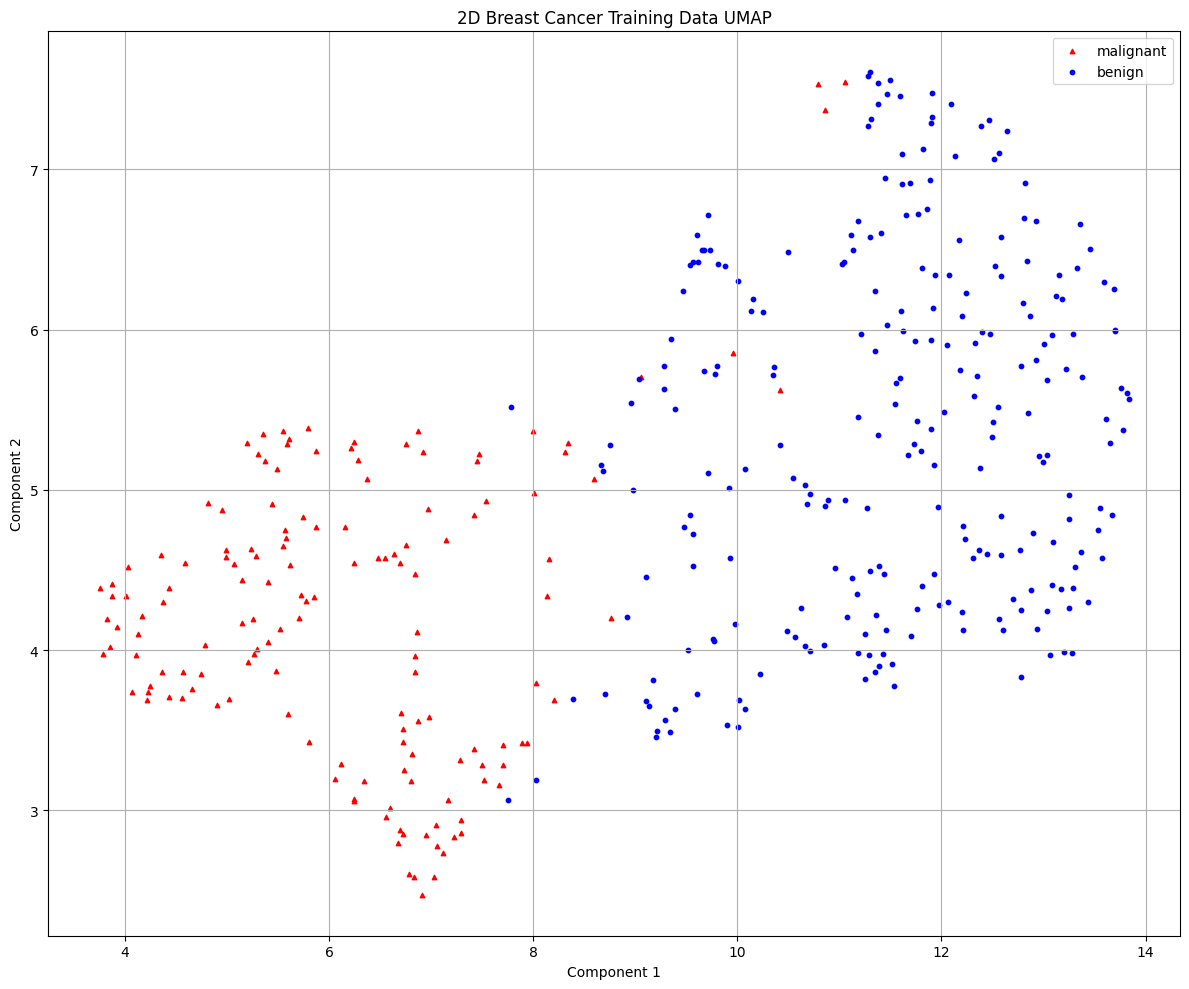

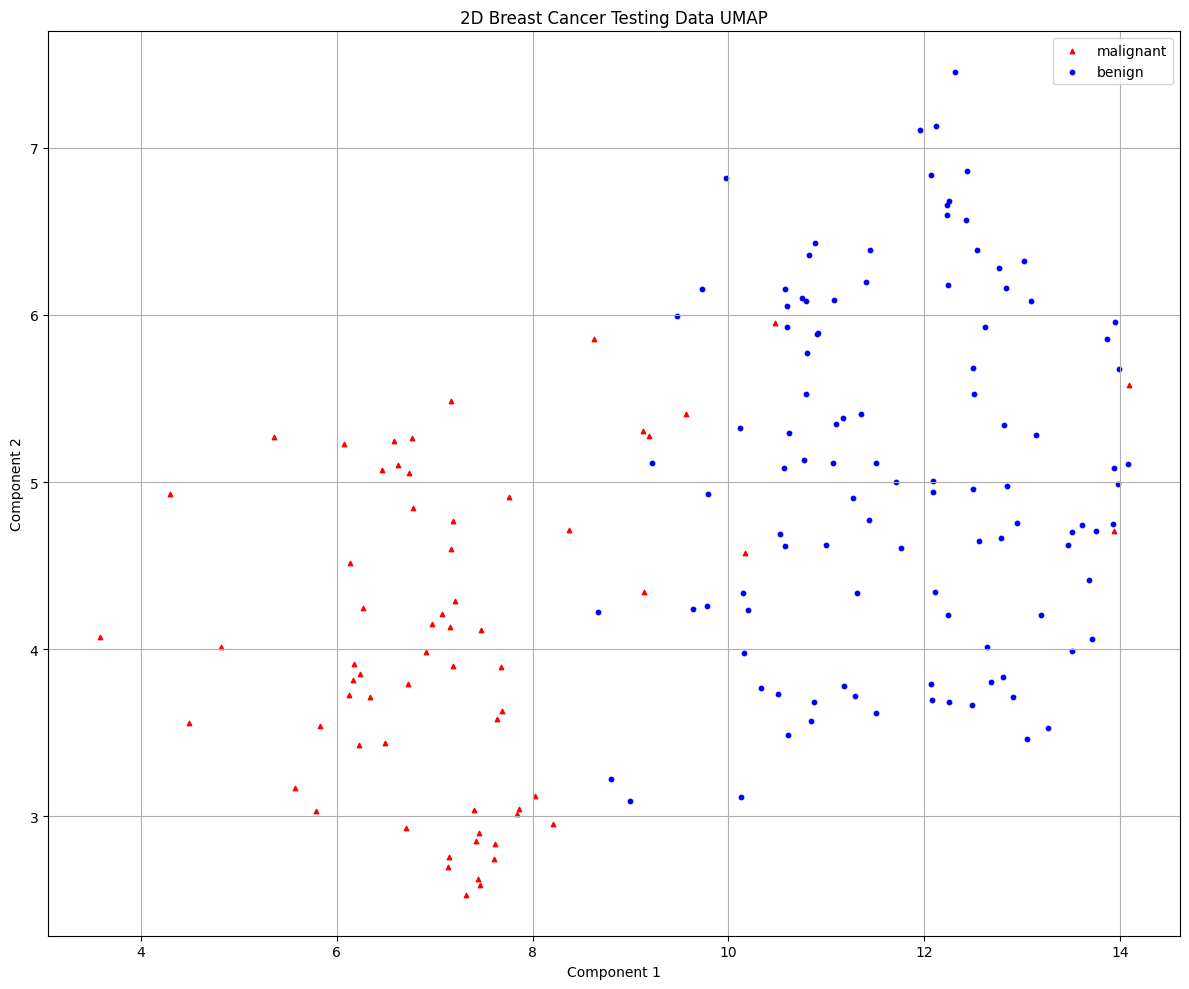

[I 2025-04-27 11:22:12,925] A new study created in memory with name: no-name-29b3994c-48a1-4782-98a2-34c43f392b27
[I 2025-04-27 11:22:12,971] Trial 0 finished with value: 0.9497784810126582 and parameters: {'C': 88.92582352704801, 'kernel': 'rbf', 'gamma': 6.253415726347322, 'max_iter': 9083}. Best is trial 0 with value: 0.9497784810126582.
[I 2025-04-27 11:22:12,984] Trial 1 finished with value: 0.9723734177215189 and parameters: {'C': 0.08422978496645524, 'kernel': 'linear', 'max_iter': 7472}. Best is trial 1 with value: 0.9723734177215189.
[I 2025-04-27 11:22:12,998] Trial 2 finished with value: 0.969873417721519 and parameters: {'C': 1.7336767366825678, 'kernel': 'linear', 'max_iter': 1098}. Best is trial 1 with value: 0.9723734177215189.
[I 2025-04-27 11:22:13,017] Trial 3 finished with value: 0.9673101265822786 and parameters: {'C': 0.001113135731228814, 'kernel': 'linear', 'max_iter': 8080}. Best is trial 1 with value: 0.9723734177215189.
[I 2025-04-27 11:22:13,037] Trial 4 fini

Best trial:
Accuracy: 0.9724367088607595
Best hyperparameters:  {'C': 0.18772579085890623, 'kernel': 'linear', 'max_iter': 2837}


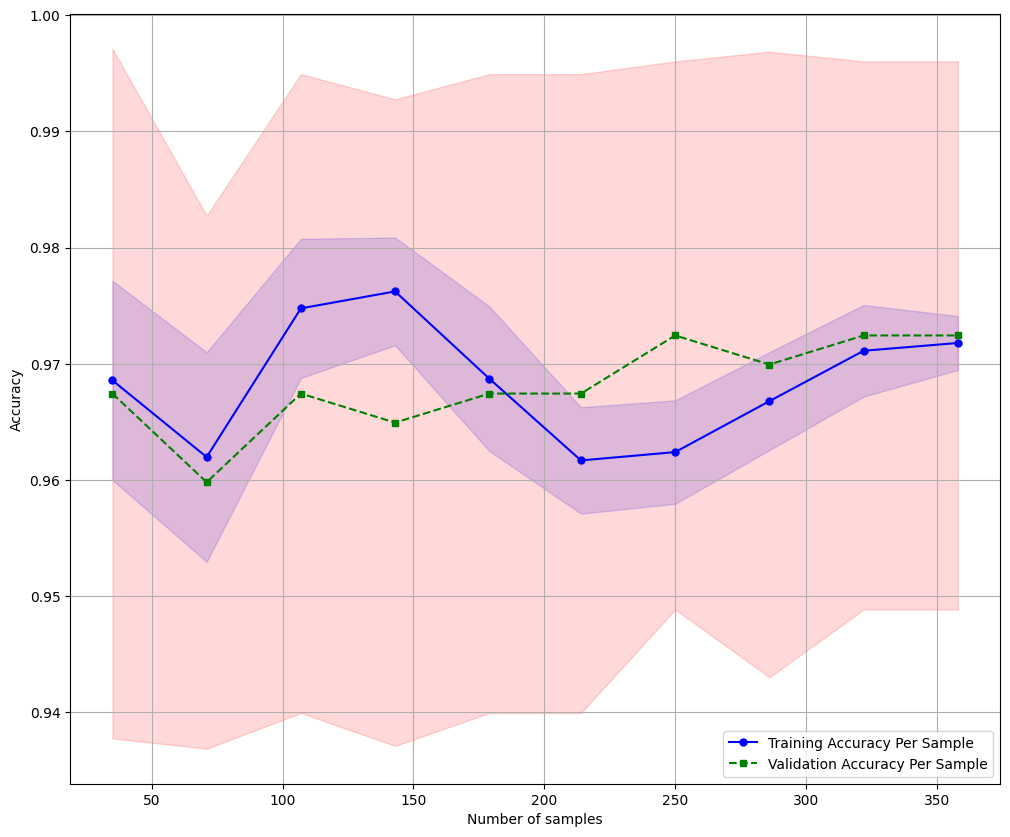

Confusion Matrix
[[ 55   9]
 [  0 107]]
Accuracy: 0.9474, Precision: 0.9224, Recall: 1.0000, F1: 0.9596, AUC: 0.9635


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(X_train_scaled, X_test_scaled, y_train, y_test, 'umap', {})

helper.train_and_evaluate_model('svc', X_train_feature_extracted, X_test_feature_extracted, y_train, y_test)